## **REGULARIZATION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML /Dataset/cars.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### **EDA and Preprocessing**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
168     5
102     5
95      5
85      5
74      5
103     5
94      5
65      5
106     4
148     4
118     4
93      4
122     4
101     3
154     3
83      3
115     3
125     3
137     3
119     2
145     2
110     2
188     2
87      2
197     2
129     2
89      2
113     2
153     2
164     2
108     2
194     2
81      2
192     2
158     2
98      1
107     1
142     1
90      1
77      1
121     1
78      1
256     1
231     1
186     1
Name: normalized-losses, dtype: int64

In [5]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
62      6
88      6
160     6
114     6
101     6
145     5
97      5
102     5
82      5
84      5
76      5
123     4
111     4
86      4
92      4
121     3
182     3
152     3
73      3
207     3
85      3
90      3
100     2
155     2
94      2
?       2
52      2
176     2
156     2
112     2
162     2
184     2
56      2
161     2
48      1
175     1
60      1
140     1
115     1
58      1
78      1
120     1
200     1
64      1
55      1
262     1
72      1
143     1
288     1
154     1
134     1
142     1
106     1
135     1
Name: horsepower, dtype: int64

In [6]:
#Handling Missing values
df['normalized-losses'].replace("?", np.nan, inplace=True)
df['horsepower'].replace("?", np.nan, inplace=True)

df['normalized-losses'] = df['normalized-losses'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)


nlmean = df['normalized-losses'].mean()
hpmean =df['horsepower'].mean()

df['normalized-losses'].fillna(nlmean, inplace=True)
df['horsepower'].fillna(hpmean, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


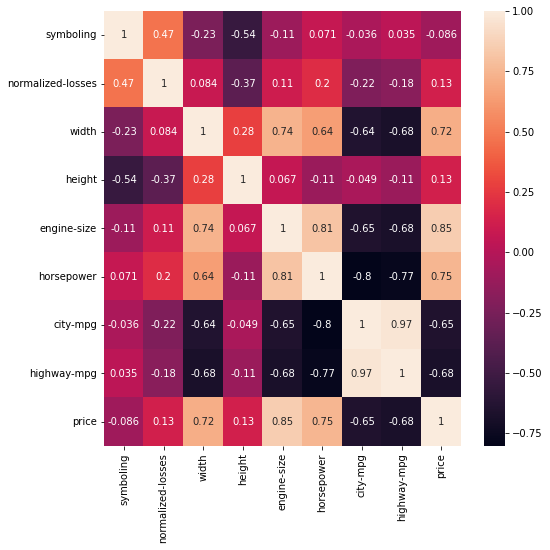

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
# Separating categorical and numerical data

df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["float64","int64"])

In [10]:
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [11]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [12]:
#  Label encoding

from sklearn.preprocessing import LabelEncoder

for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [13]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [14]:
#Concatenating numerical and categorical columns
df_new = pd.concat([df_num,df_cat],axis=1)

In [15]:
df_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,122.0,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,122.0,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,164.0,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,164.0,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


### **Dividing into training and testing test** 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_new.drop("price",axis=1)
y = df_new["price"]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### **Baseline Model**

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Train score
lr.score(X_train,y_train)

0.8504573774895473

In [22]:
# Test score
lr.score(X_test,y_test)

0.7965566780397381

In [23]:
lr.coef_

array([ 4.51384957e+01,  1.53127607e+00,  7.89452171e+02,  3.62663990e+02,
        9.83682875e+01, -1.08169245e+01,  3.08017854e+02, -4.17024371e+02,
       -2.00099087e+02, -6.22650015e+02, -1.70235175e+02,  1.86860719e+03,
        1.64133620e+04,  2.83174279e+02])

### **Ridge and Lasso Regularization**

In [24]:
from sklearn.linear_model import Lasso #lambda*sum(abs(coef))
from sklearn.linear_model import Ridge #lambda*sum(square(coef))

In [25]:
l1=Lasso(500)
l1.fit(X_train,y_train)

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
l1.coef_

array([   0.        ,    5.30204452,  139.87319933,  351.48055   ,
        129.57805501,   17.72257258,   -0.        , -105.84345305,
       -146.68991429,   -0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ])

Clearly Lasso has reduced the coefficient value of features to zero which are not important.Therfore Lasso is also used during feature selection

In [27]:
l2=Ridge(10)
l2.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [28]:
l2.coef_

array([ 2.08658930e+02, -5.60173023e-01,  3.64420144e+02,  5.72916414e+02,
        1.04441215e+02,  2.21332730e+01,  2.11271281e+02, -2.72864381e+02,
       -1.86340249e+02, -9.06610516e+02, -6.30655861e+02,  1.56860422e+03,
        2.57047785e+03,  5.15948757e+02])

Ridge also reduces the value of coefficient of features which are not important in predicting the target column

In [29]:
#Selecting the right value of lambda for Lasso
for i in range(200,500,50):
    l1 = Lasso(alpha=i)
    l1.fit(X_train,y_train)
    print(i,":",l1.score(X_test,y_test))

200 : 0.8139201358023779
250 : 0.812421909078023
300 : 0.8085057299003378
350 : 0.8036053753129061
400 : 0.7977229768452248
450 : 0.7950465607641614


In [30]:
#Selecting the right value of lambda for Ridge
for i in range(50):
    l2 = Ridge(alpha=i)
    l2.fit(X_train,y_train)
    print(i,":",l2.score(X_test,y_test))

0 : 0.7965566780397377
1 : 0.8074518758147271
2 : 0.8110292248150515
3 : 0.8126933383890032
4 : 0.81361486450293
5 : 0.8141745853539418
6 : 0.8145301242133357
7 : 0.8147582608502815
8 : 0.8149010602831952
9 : 0.8149836949253051
10 : 0.8150222867376528
11 : 0.815027724543179
12 : 0.8150076788279418
13 : 0.8149677381788262
14 : 0.8149120868051174
15 : 0.8148439278252518
16 : 0.8147657584947389
17 : 0.8146795554128122
18 : 0.8145869029046835
19 : 0.8144890843369587
20 : 0.8143871485445551
21 : 0.8142819591129827
22 : 0.8141742315788492
23 : 0.8140645619421539
24 : 0.813953448816606
25 : 0.8138413108452036
26 : 0.8137285005403773
27 : 0.8136153153884842
28 : 0.813502006836264
29 : 0.8133887876197213
30 : 0.813275837783145
31 : 0.8131633096537951
32 : 0.8130513319772293
33 : 0.8129400133729974
34 : 0.8128294452363019
35 : 0.8127197041851856
36 : 0.8126108541327799
37 : 0.812502948048576
38 : 0.8123960294605085
39 : 0.8122901337400302
40 : 0.8121852892047275
41 : 0.8120815180669062
42 : 0.81

### **FINAL MODELS**

In [31]:
l1 = Lasso(alpha=200)
l1.fit(X_train,y_train)
print("R-Squared Accuracy: ",l1.score(X_test,y_test))

R-Squared Accuracy:  0.8139201358023779


In [32]:
l1.coef_

array([ 0.00000000e+00,  2.07002782e+00,  3.23427588e+02,  4.69420186e+02,
        1.15553544e+02,  1.42784033e+01,  3.62975615e+01, -1.24776284e+02,
       -1.67461354e+02, -0.00000000e+00, -4.05115132e+02,  1.11242794e+03,
        2.09462838e+03,  3.05815537e+02])

In [33]:
l2 = Ridge(alpha=11)
l2.fit(X_train,y_train)
print("R-Squared Accuracy: ",l2.score(X_test,y_test))

R-Squared Accuracy:  0.815027724543179


In [34]:
l2.coef_

array([ 2.08075572e+02, -4.19381533e-01,  3.60059061e+02,  5.73951520e+02,
        1.04837625e+02,  2.25081577e+01,  2.09621781e+02, -2.70364868e+02,
       -1.85682528e+02, -8.73561956e+02, -6.31723522e+02,  1.53165287e+03,
        2.37667318e+03,  5.13039213e+02])